In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline
pd.options.mode.chained_assignment = None

In [162]:
who_data = pd.read_csv('https://covid.ourworldindata.org/data/full_data.csv')
jhu_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/'+
                       'COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'+
                       'time_series_19-covid-Confirmed.csv')

In [163]:
country_mapper = {
        'Korea, South': 'South Korea',
        'US': 'United States'    
}
jhu_data['Country/Region'] = jhu_data['Country/Region'].map(country_mapper).fillna(jhu_data['Country/Region'])

In [164]:
assert set(country_filter) - set(jhu_data['Country/Region']) == set()

In [165]:
jhu_data_reduced = jhu_data.drop(columns=['Lat', 'Long'])
jhu_data_reduced = jhu_data_reduced.groupby('Country/Region').sum()

In [166]:
# jhu_data_reduced = jhu_data_reduced.set_index('Country/Region', drop=True)

In [167]:
jhu_data_reduced = jhu_data_reduced.stack().reset_index()
jhu_data_reduced.columns = ['location', 'date', 'total_cases']
jhu_data_reduced['date'] = pd.to_datetime(jhu_data_reduced['date'])

In [168]:
jhu_data_reduced

,location,date,total_cases
0,Afghanistan,2020-01-22,0
1,Afghanistan,2020-01-23,0
2,Afghanistan,2020-01-24,0
3,Afghanistan,2020-01-25,0
4,Afghanistan,2020-01-26,0
...,...,...,...
7933,occupied Palestinian territory,2020-03-11,0
7934,occupied Palestinian territory,2020-03-12,0
7935,occupied Palestinian territory,2020-03-13,0
7936,occupied Palestinian territory,2020-03-14,0


In [169]:
# jhu_data_reduced.query('total_cases > 10000')

In [170]:
# who_data

In [171]:
t0_threshold = 100
who_data_t0 = who_data.query('total_cases >= @t0_threshold')
jhu_data_t0 = jhu_data_reduced.query('total_cases >= @t0_threshold')

In [172]:
t0_date_w = who_data_t0.groupby('location').min()['date']
t0_date_j = jhu_data_t0.groupby('location').min()['date']

In [173]:
who_data_t0.loc[:, 't0_date'] = who_data_t0['location'].map(t0_date_j)
jhu_data_t0.loc[:, 't0_date'] = jhu_data_t0['location'].map(t0_date_w)

In [174]:
who_data_t0.loc[:, 'since_t0'] = pd.to_datetime(who_data_t0['date']) - pd.to_datetime(who_data_t0['t0_date'])
who_data_t0.loc[:, 'since_t0']  = who_data_t0['since_t0'].map(lambda x: x.days)
jhu_data_t0.loc[:, 'since_t0'] = pd.to_datetime(jhu_data_t0['date']) - pd.to_datetime(jhu_data_t0['t0_date'])
jhu_data_t0.loc[:, 'since_t0']  = jhu_data_t0['since_t0'].map(lambda x: x.days)
jhu_data_t0.loc[:, 'since_t0'] = jhu_data_t0.loc[:, 'since_t0'].where(jhu_data_t0['since_t0'] > 0, 0)

In [175]:
who_data_t0['location'].value_counts().sort_values(ascending=False).keys()

Index(['China', 'World', 'International', 'South Korea', 'Japan', 'Italy',
       'Iran', 'Singapore', 'France', 'Germany', 'Spain', 'United States',
       'United Kingdom', 'Netherlands', 'Switzerland', 'Sweden', 'Norway',
       'Belgium', 'Austria', 'Bahrain', 'Malaysia', 'Denmark', 'Australia',
       'Qatar', 'Canada', 'Czech Republic', 'Finland', 'Kuwait', 'Israel',
       'Portugal', 'Slovenia', 'Greece', 'Poland', 'India', 'Iceland',
       'Saudi Arabia', 'Ireland', 'Romania', 'Brazil', 'Indonesia',
       'Philippines'],
      dtype='object')

In [176]:
country_filter = ['China', 'South Korea', 'Italy', 'Iran', 'United States']

In [177]:
## NOT ACCOUNTING FOR PROVINCE....

In [178]:
jhu_data_t0[jhu_data_t0['location'].isin(country_filter)]['total_cases']

1512     548
1513     643
1514     920
1515    1406
1516    2075
        ... 
7663    1281
7664    1663
7665    2179
7666    2727
7667    3499
Name: total_cases, Length: 133, dtype: int64

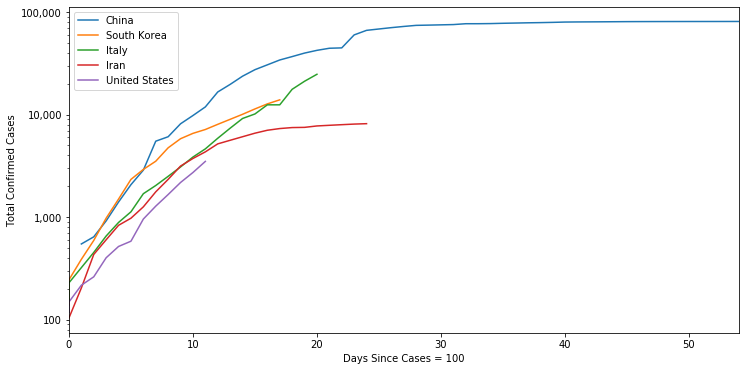

In [179]:
ax = plt.gca()
p=jhu_data_t0[jhu_data_t0['location'].isin(country_filter)].groupby('location').plot(x='since_t0', 
                                                                                     y='total_cases', 
                                                                                     ax=ax, logy=True)
ax.figure.set_size_inches(12,6)
ax.legend(country_filter)
ax.set_xlabel('Days Since Cases = 100')
ax.set_ylabel('Total Confirmed Cases')
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

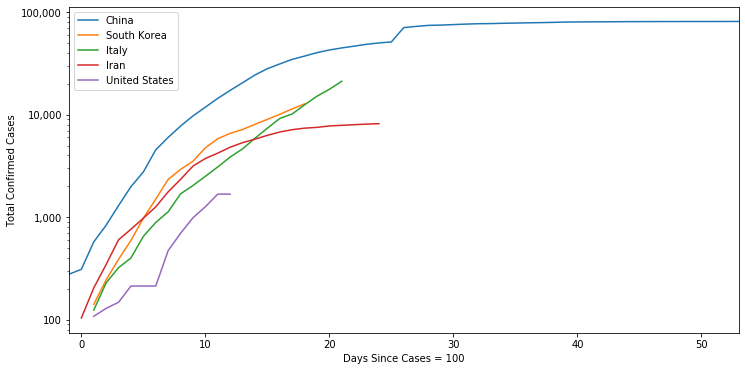

In [180]:
ax = plt.gca()
p=who_data_t0[who_data_t0['location'].isin(country_filter)].groupby('location').plot(x='since_t0', y='total_cases', ax=ax, logy=True)
ax.figure.set_size_inches(12,6)
ax.legend(country_filter)
ax.set_xlabel('Days Since Cases = 100')
ax.set_ylabel('Total Confirmed Cases')
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))